# MLS-Project-2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lin
import numpy as np

In [2]:
# Read Dataset into Dataframe
power_data = pd.read_csv("Resources/power_dataset.csv")

power_data

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


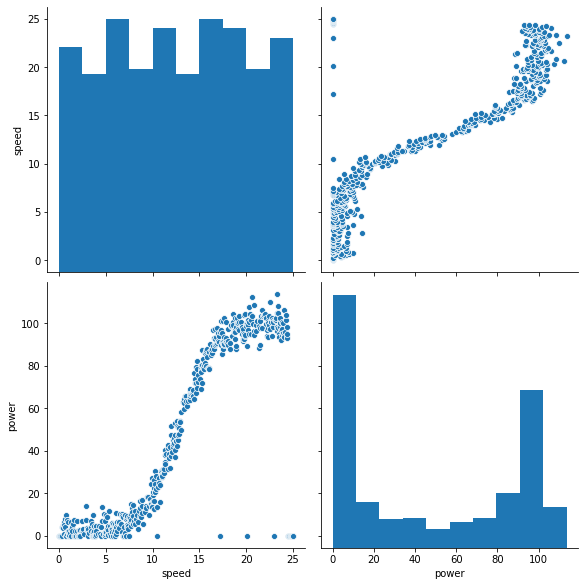

In [3]:
# Pairplot used to get basic overview of relationship between wind speed and power
sns.pairplot(power_data, height=4)

## Pairplot

The pairplot above of the power_data shows a couple of different things.

- The plot of speed by speed shows that we have a pretty much uniform distribution of wind speed accross 0-25 units of assuming mph.
- The plot of power by power indicates that for a great deal of time 0 power was produced even though there was a pretty much uniform spread of speed accross the dataset with another peak aroun the 100 power unit. This leads me to believe that for a great amount of time that even though power could have been produced the windmill was not producing power possibly for maintenance reasons.
- Finally when we look at the plot of speed and power we can see what looks like a linear relationship between wind speed and power because as the wind speed increases so to does the power production.
- Also from the plot of speed and power we can assume the earlier suggestion was correct in that even though the wind speeds were higher that 10 0 power was produced, comparing this to other rows where power was produced and quite a lot in comparison we can assume that the windmill was down for whatever reason.
- It appears that power production starts to increase above a wind speed of 10, also for the training of our model we can safetly not include the lines where wind speed is greater than or equal to 10 so as to get a more accurate model.

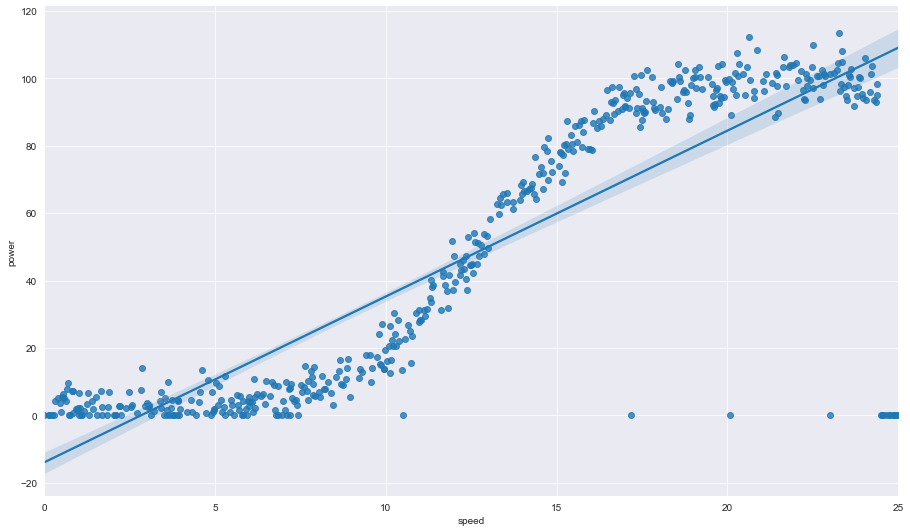

In [4]:
sns.set_style("darkgrid")

sns.lmplot(x="speed", y="power", data=power_data, height=7.5, aspect=1.7, fit_reg=True);

### Cleanse Data
Remove 0 Values from dataset where windspeed is greater than 0.

In [5]:
# Speed = 0 & Power = 0
clean_data = power_data[(power_data["speed"]==0) & (power_data["power"]==0)]

# Speed > 0 & Power > 0
non_zero = power_data[(power_data["speed"]>0) & (power_data["power"]>0)]

# Combine Data
clean_data = clean_data.append(non_zero)

In [6]:
clean_data

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


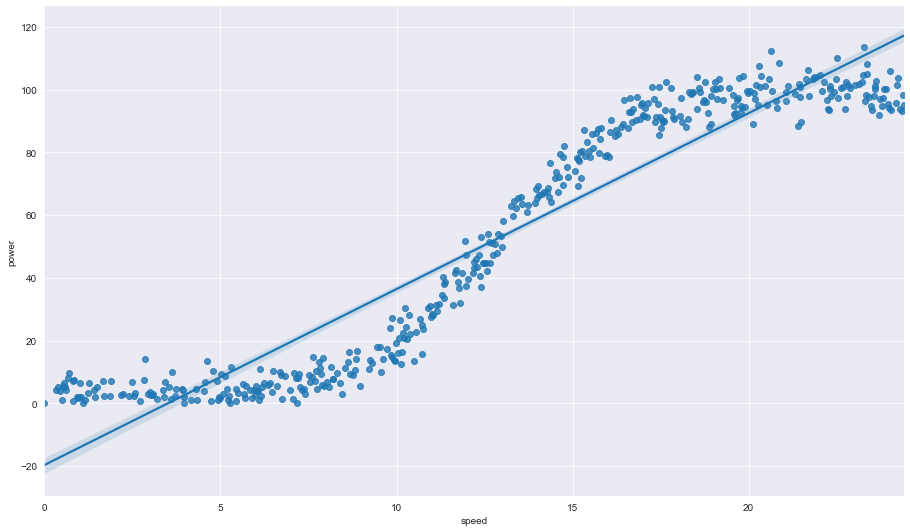

In [7]:
sns.set_style("darkgrid")

sns.lmplot(x="speed", y="power", data=clean_data, height=7.5, aspect=1.7, fit_reg=True);

## Models

### Linear Model
Code for below adapted from Topic 3 Lectures.

#### Non Clean Data

In [8]:
nc_x = power_data["speed"].to_numpy()
nc_y = power_data["power"].to_numpy()

nc_x = nc_x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(nc_x, nc_y)
nc_r = model.score(nc_x, nc_y)
nc_p = [model.intercept_, model.coef_[0]]

In [9]:
nc_r

0.7289360258564073

In [10]:
nc_p

[-13.899902630519634, 4.9175956654046695]

### Non Clean Linear Model Prediction
0 Values were removed from the dataset to try to remove any noise in the analysis that could be influencing the regression line as discussed earlier if the windspeed is greater than 0 the power output should not be 0.

In [11]:
def nc_linear_model(nc_x, nc_p):
    return nc_p[0] + nc_x * nc_p[1]

In [12]:
def nc_linear_predict(nc_x):
    return nc_linear_model(nc_x, nc_p)

In [13]:
nc_linear_predict(20.0)

84.45201067757375

#### Cleansed Data

In [14]:
c_x = clean_data["speed"].to_numpy()
c_y = clean_data["power"].to_numpy()

c_x = c_x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(c_x, c_y)
c_r = model.score(c_x, c_y)
c_p = [model.intercept_, model.coef_[0]]

In [15]:
c_r

0.8983450728341917

In [16]:
c_p

[-19.636232996770858, 5.606684691495636]

### Cleansed Linear Model Prediction

In [17]:
def c_linear_model(c_x, c_p):
    return c_p[0] + c_x * c_p[1]

In [18]:
def c_linear_predict(c_x):
    return c_linear_model(c_x, c_p)

In [19]:
c_linear_predict(20.0)

92.49746083314187

Cleaning up the data appears to have given a better fit to the line as at the higher end of the plot the regression line is closer to the cluster of power points. The orignial prediction for a windspeed of 20.0 was **84.45**, whereas the prediction from the cleansed data has given a result of **92.50**. 

When we take a look at the graph below along with both predictions with a wind speed of 20.0 as mentioned above, additional predictions were also plotted for 5, 10, 15 and 25 wind speed also. For all predictions bar the one with windspeed 10 the Cleaned data was closer to the groupings of actual data points and so this seems to be the more accurate linear model.

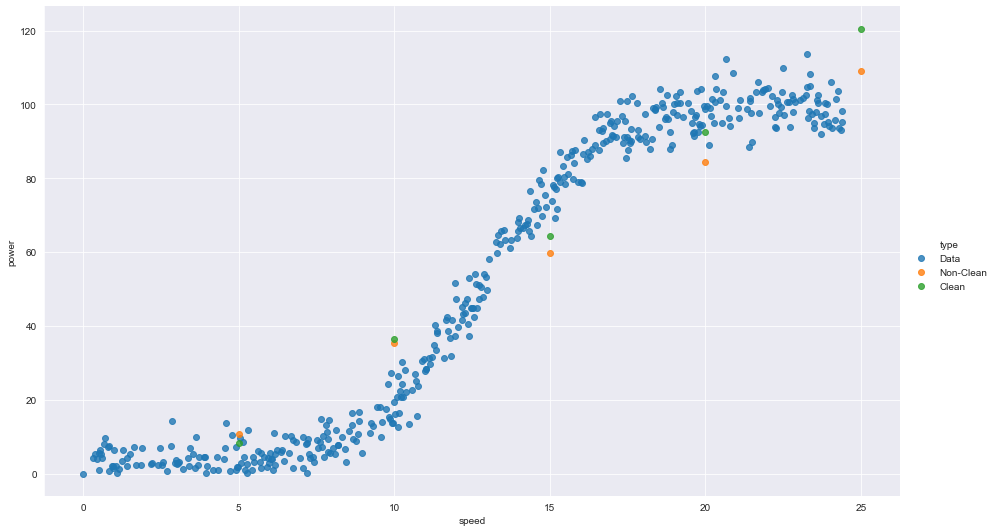

In [20]:
sns.set_style("darkgrid")

# Dataframe to house Data & Predictions
comparison = clean_data
comparison['type'] = 'Data'

# Counter for While Loop
counter = 5

# Make 5 Predictions Using Non-Clean Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[nc_linear_predict(counter)], 'type':['Non-Clean']}
    comparison = comparison.append(pd.DataFrame(data=d))
    counter += 5

# Reset Counter
counter = 5

# Make 5 Predictions Using Cleaned Data Trained Model
while counter < 26:
    d = {'speed':[counter], 'power':[c_linear_predict(counter)], 'type':['Clean']}
    comparison = comparison.append(pd.DataFrame(data=d))
    counter += 5
    
# Plot all data together
sns.lmplot(x="speed", y="power", data=comparison, hue="type", height=7.5, aspect=1.7, fit_reg=False);